Our phantom directories are ['1754851714', '1754911983', '1754891018', '1754812538', '1754835846', '1754766212', '1754786138', '1754736391', '1754830988', '1754720052', '1754728076', '1754889604', '1754769822', '1754857989', '1754837504', '1754842332', '1754738217', '1754756028', '1754899978', '1754797873', '1754832919', '1754821589', '1754701932', '1754895449', '1754803019', '1754854954', '1754737590', '1754866119', '1754897892', '1754772796', '1754711014', '1754877637', '1754880059', '1754746587', '1754682284', '1754688732', '1754910927', '1754782512', '1754788282', '1754757935', '1754862282', '1754721950', '1754821900', '1754693095', '1754908945', '1754798752', '1754869731']
Meta data for phantom 1754857989: {'vox_scale_to_m': 0.001, 'atten_scale_to_m': 100.0, 'scat_scale_to_m': 1000000.0, 'source_dist_isocenter_m': 1, 'source_spect': {1.0: 1.0}, 'bin_linspace': array([0.32447136, 0.32476067, 0.32504997, 0.32533928, 0.32562858,
       0.32591789, 0.32620719, 0.3264965 , 0.3267858 , 

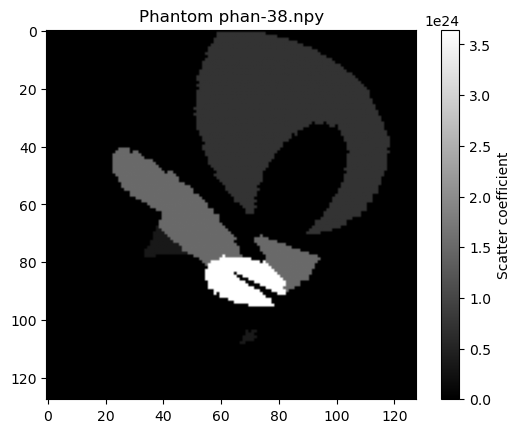

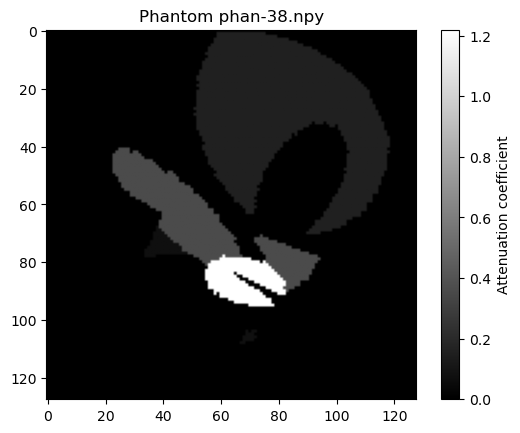

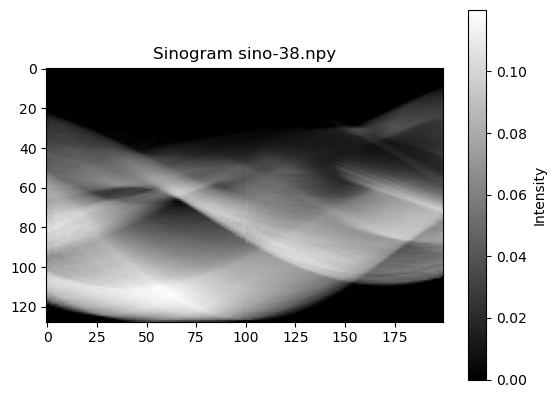

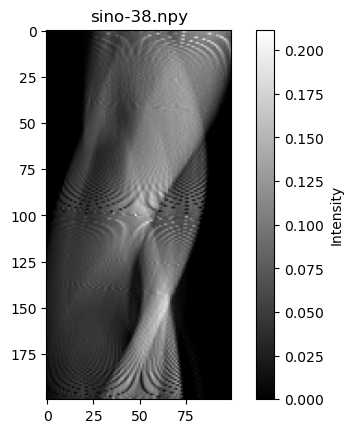

In [61]:
#@title Let's use this notebook to analyse the data we're generating

import numpy as np
import matplotlib.pyplot as plt
import os

# Get all directories within ../data folder
data_dir = '../data'
dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print(f"Our phantom directories are {dirs}")

# Get all files within a directory
def get_files_in_dir(dir_name):
    return [f for f in os.listdir(os.path.join(data_dir, dir_name)) if os.path.isfile(os.path.join(data_dir, dir_name, f))]

# Select random directory, then a random file beginning with "phan"
dir_name = np.random.choice(dirs)
files = get_files_in_dir(dir_name)
phan_file_name = np.random.choice([f for f in files if f.startswith('phan')])
sino_file_name = f"sino-{phan_file_name.split("-")[1].split(".")[0]}.npy"

# Load meta.npy file
meta = np.load(os.path.join(data_dir, dir_name, 'meta.npy'), allow_pickle=True).item()
print(f"Meta data for phantom {dir_name}: {meta}")

# Load the data
phan_data = np.load(os.path.join(data_dir, dir_name, phan_file_name))
# Display the data
plt.imshow(phan_data[0], cmap='gray')
plt.title(f"Phantom {phan_file_name}")
plt.colorbar(label="Scatter coefficient")
plt.show()
plt.imshow(phan_data[1], cmap='gray')
plt.title(f"Phantom {phan_file_name}")
plt.colorbar(label="Attenuation coefficient")
plt.show()

# Load the data
sino_data = np.load(os.path.join(data_dir, dir_name, sino_file_name))
# Display the data
plt.imshow(np.sum(sino_data, axis=2), cmap='gray')
plt.title(f"Sinogram {sino_file_name}")
plt.colorbar(label="Intensity")
plt.show()


plt.imshow(np.sum(sino_data, axis=0), cmap='gray')
plt.title(f"{sino_file_name}")
plt.colorbar(label="Intensity")
plt.show()

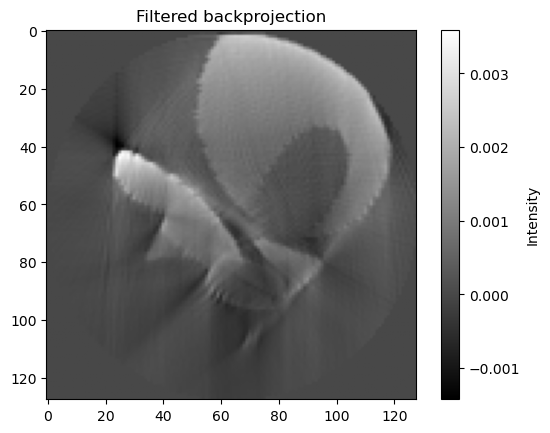

In [62]:
#@title Let's use some classical reconstruction algorithms to reconstruct the phantom

import numpy as np
from skimage.transform import iradon, iradon_sart

# Filtered backprojection
# P.S. skimage's iradon seems to do 180 degrees
recon = iradon(np.sum(sino_data, axis=2)[:,:200], circle=True, filter_name='ramp')

# Display the data
plt.imshow(recon, cmap='gray')
plt.title(f"Filtered backprojection")
plt.colorbar(label="Intensity")
plt.show()

In [63]:
from material_loader import MaterialLoader

material_loader = MaterialLoader(prop_data_path="/home/samnub/dev/lircst-ana/res/nist_ele_prop.json", 
                                 atten_data_path="/home/samnub/dev/lircst-ana/res/nist_ele_atten.json",
                                 prop_comp_data_path="/home/samnub/dev/lircst-ana/res/nist_comp_prop.json",
                                 atten_comp_data_path="/home/samnub/dev/lircst-ana/res/nist_comp_atten.json",)
# Load the properties
names = material_loader.get_all_material_names()
print(f"Material names: {names}")
name = "Bone, Cortical (ICRU-44)" # prop_loader.get_random_material_name()
prop_datum = material_loader.get_prop_data(name)
print(f"Properties for name {name}: {prop_datum}")
print(f"Electron density for name {name}: {material_loader.calc_electron_density(name, is_per_mole=True)}")
atten_datum = material_loader.get_atten_data(name)
print(f"Attenuation data for name {name}: {atten_datum}, entries: {len(atten_datum)}")
MeV = 1
coeff = material_loader.calc_mass_atten_coeff_at_energy(name, MeV)
print(f"Mass attenuation coefficient for name {name} at {MeV} MeV: {coeff}")
lincoeff = material_loader.calc_atten_coeff_at_energy(name, MeV)
print(f"Linear attenuation coefficient for name {name} at {MeV} MeV: {lincoeff}")


Material names: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', 'Nothing', 'A-150 Tissue-Equivalent Plastic', 'Adipose Tissue (ICRU-44)', 'Air, Dry (near sea level)', 'Alanine', 'B-100 Bone-Equivalent Plastic', 'Bakelite', 'Blood, Whole (ICRU-44)', 'Bone, Cortical (ICRU-44)', 'Brain, Grey/White Matter (ICRU-44)', 'Breast Tissue (ICRU-44)', 'C-552 Air-equivalent Plastic', 'Cadmium Telluride', 'Calcium Fluoride', 'Calcium Sulfate', '15 mmol L-1 Ceric Ammonium Sulfate Solution', 'Cesium Iodide', 'Concr